## Building a Movie Content Based Recommendation System

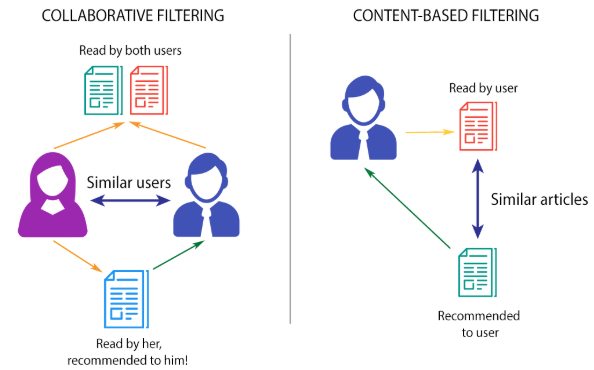

In [1]:
import pandas as pd
import numpy as np

In [2]:
#https://www.kaggle.com/tmdb/tmdb-movie-metadata
credits = pd.read_csv("contentbasedfildataset/tmdb_5000_credits.csv")

In [3]:
movies_df = pd.read_csv("contentbasedfildataset/tmdb_5000_movies.csv")

In [4]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
print("Credits:",credits.shape)
print("Movies Dataframe:",movies_df.shape)

Credits: (4803, 4)
Movies Dataframe: (4803, 20)


In [7]:
credits_column_renamed = credits.rename(index=str, columns={"movie_id": "id"})
movies_df_merge = movies_df.merge(credits_column_renamed, on='id')
movies_df_merge.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [8]:
movies_cleaned_df = movies_df_merge.drop(columns=['homepage', 'title_x', 'title_y', 'status','production_countries'])
movies_cleaned_df.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [9]:
movies_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   release_date          4802 non-null   object 
 10  revenue               4803 non-null   int64  
 11  runtime               4801 non-null   float64
 12  spoken_languages      4803 non-null   object 
 13  tagline               3959 non-null   object 
 14  vote_average          4803 non-null   float64
 15  vote_count           

### Content Based Recommendation System

Now lets make a recommendations based on the movie’s plot summaries given in the overview column. So if our user gives us a movie title, our goal is to recommend movies that share similar plot summaries.

In [10]:
movies_cleaned_df.head(1)['overview']

0    In the 22nd century, a paraplegic Marine is di...
Name: overview, dtype: object

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
movies_cleaned_df['overview'] = movies_cleaned_df['overview'].fillna('')

In [12]:
# Fitting the TF-IDF on the 'overview' text
tfv_matrix = tfv.fit_transform(movies_cleaned_df['overview'])

In [13]:
tfv_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 127220 stored elements and shape (4803, 10417)>

In [14]:
tfv_matrix.shape

(4803, 10417)

In [15]:
import numpy as np
from sklearn.metrics.pairwise import sigmoid_kernel

# Example data
X = np.array([[1, 2], [3, 4], [5, 6]])
Y = np.array([[1, 0], [0, 1]])

# Compute the sigmoid kernel between X and Y
K = sigmoid_kernel(X, Y, gamma=0.1, coef0=1)

print("Sigmoid Kernel between X and Y:\n", K)

# Compute the sigmoid kernel between X and itself
K_self = sigmoid_kernel(X, gamma=0.1, coef0=1)

print("Sigmoid Kernel between X and itself:\n", K_self)


Sigmoid Kernel between X and Y:
 [[0.80049902 0.83365461]
 [0.86172316 0.88535165]
 [0.90514825 0.92166855]]
Sigmoid Kernel between X and itself:
 [[0.90514825 0.97045194 0.99100745]
 [0.97045194 0.9981779  0.9998891 ]
 [0.99100745 0.9998891  0.99999864]]


In [16]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix)

In [17]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity = cosine_similarity(tfv_matrix)


In [18]:
cosine_similarity[0]

array([1., 0., 0., ..., 0., 0., 0.], shape=(4803,))

In [46]:
sig[0]

array([0.76163447, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159416])

In [19]:
# Reverse mapping of indices and movie titles
indices = pd.Series(movies_cleaned_df.index, index=movies_cleaned_df['original_title']).drop_duplicates()

In [21]:
indices

original_title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [22]:
indices['Newlyweds']

np.int64(4799)

In [23]:
sig[4799]

array([0.76159416, 0.76159416, 0.76159438, ..., 0.76159432, 0.76159416,
       0.76159478], shape=(4803,))

In [24]:
list(enumerate(cosine_similarity[indices['Newlyweds']]))

[(0, np.float64(0.0)),
 (1, np.float64(0.0)),
 (2, np.float64(0.005536395241932141)),
 (3, np.float64(0.009933162166236003)),
 (4, np.float64(0.010466718716066952)),
 (5, np.float64(0.004237533450170518)),
 (6, np.float64(0.016447127257647038)),
 (7, np.float64(0.004737940184782886)),
 (8, np.float64(0.005813542695623039)),
 (9, np.float64(0.013203129851866436)),
 (10, np.float64(0.0)),
 (11, np.float64(0.0)),
 (12, np.float64(0.0)),
 (13, np.float64(0.0)),
 (14, np.float64(0.0)),
 (15, np.float64(0.0)),
 (16, np.float64(0.004932437312093816)),
 (17, np.float64(0.020077921139351442)),
 (18, np.float64(0.003126252307371049)),
 (19, np.float64(0.008738139148007255)),
 (20, np.float64(0.0033952175743822022)),
 (21, np.float64(0.02052097613837684)),
 (22, np.float64(0.0)),
 (23, np.float64(0.006756945355465071)),
 (24, np.float64(0.0)),
 (25, np.float64(0.0)),
 (26, np.float64(0.0)),
 (27, np.float64(0.007386673839431932)),
 (28, np.float64(0.0)),
 (29, np.float64(0.003705587212412732)),
 

In [25]:
list(enumerate(sig[indices['Newlyweds']]))

[(0, np.float64(0.7615941559557649)),
 (1, np.float64(0.7615941559557649)),
 (2, np.float64(0.7615943791623508)),
 (3, np.float64(0.7615945564232902)),
 (4, np.float64(0.7615945779342556)),
 (5, np.float64(0.7615943267971559)),
 (6, np.float64(0.7615948190414071)),
 (7, np.float64(0.761594346971664)),
 (8, np.float64(0.7615943903358866)),
 (9, np.float64(0.761594688255891)),
 (10, np.float64(0.7615941559557649)),
 (11, np.float64(0.7615941559557649)),
 (12, np.float64(0.7615941559557649)),
 (13, np.float64(0.7615941559557649)),
 (14, np.float64(0.7615941559557649)),
 (15, np.float64(0.7615941559557649)),
 (16, np.float64(0.7615943548130525)),
 (17, np.float64(0.761594965420998)),
 (18, np.float64(0.7615942819944952)),
 (19, np.float64(0.7615945082445131)),
 (20, np.float64(0.7615942928381602)),
 (21, np.float64(0.7615949832832596)),
 (22, np.float64(0.7615941559557649)),
 (23, np.float64(0.761594428370306)),
 (24, np.float64(0.7615941559557649)),
 (25, np.float64(0.7615941559557649)),


In [26]:
sorted(list(enumerate(cosine_similarity[indices['Newlyweds']])), key=lambda x: x[1], reverse=True)

[(4799, np.float64(1.0)),
 (616, np.float64(0.26441458639923454)),
 (2689, np.float64(0.2444697630325774)),
 (869, np.float64(0.20311489973210445)),
 (3969, np.float64(0.14307402645097683)),
 (1576, np.float64(0.14240309688107305)),
 (2290, np.float64(0.13978736734480254)),
 (1032, np.float64(0.1382433002694739)),
 (3145, np.float64(0.1345841988931114)),
 (2531, np.float64(0.1258010588823439)),
 (504, np.float64(0.12405310248456602)),
 (866, np.float64(0.11242739051364986)),
 (1157, np.float64(0.10779647911404376)),
 (2962, np.float64(0.10390387332156072)),
 (242, np.float64(0.10177033538786641)),
 (4576, np.float64(0.1007102073877331)),
 (1223, np.float64(0.1004362916007741)),
 (3479, np.float64(0.10040913753777445)),
 (2586, np.float64(0.09527777906011886)),
 (2688, np.float64(0.09356522431983151)),
 (3155, np.float64(0.09332462733153628)),
 (2869, np.float64(0.09259078629847922)),
 (3559, np.float64(0.09244574508646757)),
 (4641, np.float64(0.0922138701326605)),
 (1632, np.float64(0

In [27]:
sorted(list(enumerate(sig[indices['Newlyweds']])), key=lambda x: x[1], reverse=True)

[(4799, np.float64(0.7616344692549826)),
 (616, np.float64(0.7616048159533783)),
 (2689, np.float64(0.7616040118828756)),
 (869, np.float64(0.7616023446645636)),
 (3969, np.float64(0.7615999241031715)),
 (1576, np.float64(0.761599897054374)),
 (2290, np.float64(0.7615997916001525)),
 (1032, np.float64(0.7615997293504287)),
 (3145, np.float64(0.7615995818321376)),
 (2531, np.float64(0.7615992277356394)),
 (504, np.float64(0.7615991572658852)),
 (866, np.float64(0.7615986885689172)),
 (1157, np.float64(0.7615985018709569)),
 (2962, np.float64(0.7615983449381306)),
 (242, np.float64(0.7615982589231822)),
 (4576, np.float64(0.761598216183433)),
 (1223, np.float64(0.761598205140339)),
 (3479, np.float64(0.7615982040456052)),
 (2586, np.float64(0.7615979971714508)),
 (2688, np.float64(0.7615979281286247)),
 (3155, np.float64(0.7615979184287897)),
 (2869, np.float64(0.7615978888434758)),
 (3559, np.float64(0.7615978829960376)),
 (4641, np.float64(0.7615978736478359)),
 (1632, np.float64(0.761

In [28]:
def give_rec(title, cosine_similarity=cosine_similarity):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(cosine_similarity[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    # return movies_cleaned_df['original_title'].iloc[movie_indices]
    return movies_cleaned_df['original_title'].iloc[movie_indices]

In [29]:
give_rec('Spectre')

1343          Never Say Never Again
29                          Skyfall
3162                    Thunderball
4071          From Russia with Love
11                Quantum of Solace
3351    The Man with the Golden Gun
1717                     Safe Haven
4009          2016: Obama's America
1200           The Living Daylights
4339                         Dr. No
Name: original_title, dtype: object

In [30]:
def give_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    # return movies_cleaned_df['original_title'].iloc[movie_indices]
    return movies_cleaned_df['original_title'].iloc[movie_indices]

In [31]:
# Testing our content-based recommendation system with the seminal film Spy Kids
give_rec('Spectre')

1343          Never Say Never Again
29                          Skyfall
3162                    Thunderball
4071          From Russia with Love
11                Quantum of Solace
3351    The Man with the Golden Gun
1717                     Safe Haven
4009          2016: Obama's America
1200           The Living Daylights
4339                         Dr. No
Name: original_title, dtype: object